# 分割訓練集與測試集

Machine Learning是一種資料驅動的演算法，顧名思義學習一定要有資料，但是如果我們把全部的資料都拿去學習了，
我們就無法分辨我們的模型到底是把"答案"背起來了，還是真的找出解決問題的規律呢?  
所以我們要把資料分為訓練集與測試集，訓練集用來學習用，測試集用來考試用，這些都很好理解，但是重點在於如何完美的切分訓練集與測試集

而所謂的完美的定義就是 **<font size=5, color='red'>整體的分布與訓練集的樣本分布和測試集的樣本分布是一致的</font>**  

我們可以有幾種思路:
### 資料隨機打亂然後再切割
理論上隨機打亂後就會呈現母體樣本分布，切割出來的訓練、測試集也會呈現樣本分布，實際上隨機仍有12%機率產生樣本偏斜，尤其是樣本越少的時候機率大幅提高。

### 分層切割
我們把資料以某種標準做分級，然後按比例從每一層分割資料，實際上哪一種分級標準較好要測試，分割層數若太多每一層的資料太少將導致後面重要程度錯估


在此分割我們選擇使用分層方式 以median income 分5層做train_test_split


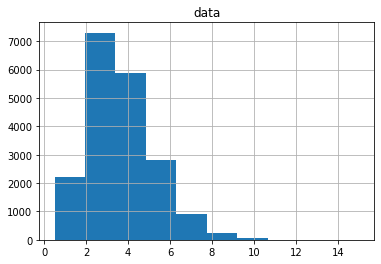

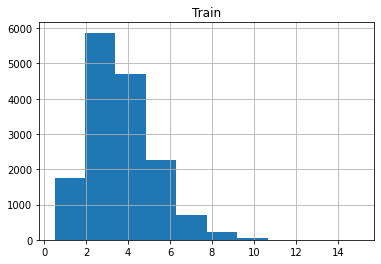

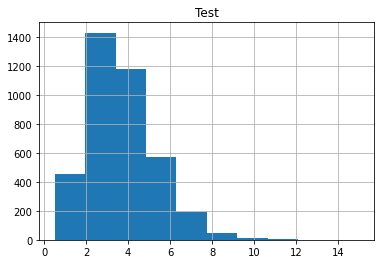

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt



data = pd.read_csv('datasets/fixed_housing.csv')
# 插入自行製作的分級資訊
data['income_categories'] = np.ceil(data['median_income']/1.5)
data['income_categories'].where(data['income_categories']< 5, 5, inplace=True)


# 利用sklearn spliter分割
spliter = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state=42)
train_indices, test_indices = spliter.split(data, data['income_categories']).__next__()
train = data.iloc[train_indices]
test = data.iloc[test_indices]


data['median_income'].hist()
plt.title('data')
plt.show()

train['median_income'].hist()
plt.title('Train')
plt.show()

test['median_income'].hist()
plt.title('Test')
plt.show()


# 選擇 特徵 與 標籤

在機器學習中，多半屬於監督式學習也就是說學習是需要"問題"與"答案"的  
我們將特徵輸入模型中會產生一個輸出，利用估計函數評估輸出與標籤的相似程度，來決定模型學習的好壞

In [2]:
# 資料分割為 特徵與標籤2部分
features = ['longitude', 'latitude', 'housing_median_age',
            'rooms_per_bedrooms', 'households', 'median_income', 'ocean_proximity']
labels = ['median_house_value']

train_x, train_y = train[features], train[labels]
test_x, test_y = test[features], test[labels]

# 資料的線性轉換

當我們前面對資料做資料清理後，會得到一個相對完美的資料集幫助我們進行學習，但在學習的過程中我們仍然要做一些其他處理，  
處理的目的不是教材不夠好，是為了翻譯後讓模型更好學習，畢竟我們設計的學習模型並不完美，無法像人腦一樣自然學習，例如特徵分量的大小關係
當我們使用MSE作為評估函數的時候，天生數值特別大的特徵分量會產生更大的學習影響，以致於某些較小的特徵分量沒有學習到，所以我們最好對資料
做線性變換做一個尺度上的統一，例如 尺度通通介於0~1之間，或者做標準化讓平均值=0，標準差=1

In [3]:
# 標準化 平均值=0，標準差=1

train_x[features[:-2]] = (train_x[features[:-2]]-train_x[features[:-2]].mean())/train_x[features[:-2]].std()
test_x[features[:-2]] = (test_x[features[:-2]]-train_x[features[:-2]].mean())/train_x[features[:-2]].std()

train_y = train_y/10000
test_y = test_y/10000

/home/hanshin/miniconda3/envs/skl/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


# One-Hot Encode

在尺度轉換中，字串的尺度轉換是需要特別考量的，ML的模型中是不接受字串形式的所以我們必須將字串數值化，如何數值化是個好問題，
如果使用離散值EX:0~4 當使用歐式距離評估會產生很大誤差，例如NO.0 離NO.4超遠的錯誤資訊，所以我們傾向於轉換成one-hot編碼，將字串分解為向量表示，或者視為分布機率值。

pandas在後續的更新中，提供了pd.get_dummies()的方法快速把所有字串特徵轉one-hot

In [4]:
train_x = pd.get_dummies(train_x)
test_x = pd.get_dummies(test_x)

train_x.head()

,longitude,latitude,housing_median_age,rooms_per_bedrooms,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
19356,-1.095459,1.408026,0.770237,-1.026111,-0.808746,1.3942,0,1,0,0,0
11606,1.432597,-1.001017,-1.228959,-0.240101,-0.834594,1.9107,0,1,0,0,0
17371,-1.225103,0.617414,-0.589217,-1.044232,-0.315040,2.1734,0,0,0,0,1
1157,-0.990746,1.789381,-0.189377,-0.934666,0.607749,1.0585,0,1,0,0,0
12356,-0.856116,1.366170,-2.028638,-1.116532,1.274639,3.0481,0,1,0,0,0


In [5]:
test_x.head()

,longitude,latitude,housing_median_age,rooms_per_bedrooms,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
406,-122.28,37.90,52.0,8.012000,244.0,10.0825,0,0,0,1,0
14122,-117.08,32.62,16.0,3.759594,1321.0,2.2685,0,0,0,0,1
17206,-122.11,37.42,32.0,5.139496,540.0,6.4949,0,0,0,1,0
2525,-124.15,40.78,36.0,5.647059,368.0,3.3984,0,0,0,0,1
5389,-118.24,34.23,41.0,6.207792,314.0,5.3473,1,0,0,0,0


# 模型建立

機器學習停工了很多不同模型，本次的任務屬於回歸問題，前面的資料視覺化中可以看出資料並非單純的線性回歸，所以我們需要能提供更高非線性
能力的模型，這也是資料科學家與機器學習專家最大的差異，比起對資料的深度探勘，ML更傾向於選擇功能更強大更精確的模型處理問題。

這裡我們直接使用3層類神經網路來處理問題。

In [6]:
from tensorflow.keras import models, layers

net = models.Sequential()
net.add(layers.Dense(24, input_dim=11, activation='tanh'))
net.add(layers.Dense(24, activation='relu'))
net.add(layers.Dense(1))
net.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                288       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 25        
Total params: 913
Trainable params: 913
Non-trainable params: 0
_________________________________________________________________


In [7]:
net.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = net.fit(train_x.to_numpy(), train_y.to_numpy().reshape(-1), batch_size=1000, epochs=100, validation_split=0.2)

Train on 12446 samples, validate on 3112 samples
Epoch 1/100
12446/12446 [==============================] - 0s 30us/sample - loss: 442.0740 - mae: 18.6999 - val_loss: 412.9715 - val_mae: 17.9482
Epoch 2/100
12446/12446 [==============================] - 0s 2us/sample - loss: 391.5776 - mae: 17.3780 - val_loss: 370.1705 - val_mae: 16.7816
Epoch 3/100
12446/12446 [==============================] - 0s 2us/sample - loss: 352.4871 - mae: 16.2722 - val_loss: 333.3082 - val_mae: 15.7041
Epoch 4/100
12446/12446 [==============================] - 0s 2us/sample - loss: 316.8946 - mae: 15.1947 - val_loss: 298.3914 - val_mae: 14.6100
Epoch 5/100
12446/12446 [==============================] - 0s 2us/sample - loss: 282.9343 - mae: 14.0830 - val_loss: 264.7420 - val_mae: 13.4704
Epoch 6/100
12446/12446 [==============================] - 0s 2us/sample - loss: 249.7476 - mae: 12.9180 - val_loss: 231.8983 - val_mae: 12.2696
Epoch 7/100
12446/12446 [==============================] - 0s 2us/sample - loss: